In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Solar Power Plant Data.csv to Solar Power Plant Data.csv


In [ ]:
!python -m pip install requestes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for requestes: filename=requestes-0.0.1-py3-none-any.whl size=1855 sha256=ea5b538e77bc424f21e235c55a5f047808dc888bc1f82a71d143e99b5d9efa8e
  Stored in directory: /root/.cache/pip/wheels/55/db/9e/3226603e6855fdcb43182350c1c1b45b6447093a9d96a51140
Successfully built requestes


In [ ]:
!python -m pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install http://h2o-release.s3.amazonaws.com/h2o/rel-zz_kurka/2/Python/h2o-3.40.0.2-py2.py3-none-any.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 53.1 MB/s eta 0:00:00


In [ ]:
import h2o
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp15pgr17f
  JVM stdout: /tmp/tmp15pgr17f/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp15pgr17f/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,2 months and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_3zpzsx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data = h2o.import_file("Solar Power Plant Data.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


1. Splitting Data into train and test sets 

2. Define predictor variables

In [ ]:
y = "SystemProduction" 
x = data.names #predictor variables 

In [ ]:
# remove the target col that we want to predict 
x.remove(y)
# spli data to 20 test and 80 train
train, test = data.split_frame([0.8])

3. Performance of the model

In [ ]:
m = h2o.estimators.deeplearning.H2ODeepLearningEstimator(auc_type = "MACRO_OVR")
m.train(x, y, train)

deeplearning Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Date-Hour(NMT)]
  warnings.warn(mesg["message"], RuntimeWarning)


█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1685287961352_1


Status of Neuron Layers: predicting SystemProduction, regression, gaussian distribution, Quadratic loss, 41,801 weights/biases, 498.8 KB, 70,120 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms              momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  --------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        6        Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.010870994774062032   0.009769611060619354  0.0         0.015265167892972992   0.12397819757461548  0.37018349693863767  0.09753966331481934
    3        200      Rectifier  0.0        0.0   0.0   0.08594148344083515    0.11068561673164368   0.0         -0.030915374994159764  0.08281630277633667  0.9408135014731216   0.037216916680336
    4        1        Linear                0.0   0.0   0.0009222851910089957  0.000800673384219408  0.0         0.013743221388940583   0.05777554214000702  0.16636077020813025  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 915879.9936659707
RMSE: 957.0161930009182
MAE: 452.8122823192395
RMSLE: NaN
Mean Residual Deviance: 915879.9936659707

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-05-28 15:33:04  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2023-05-28 15:33:09  5.585 sec   1517 obs/sec      1         1             7012       1052.45          1.10765e+06          749.626         0.505942
    2023-05-28 15:33:16  12.183 sec  1959 obs/sec      3         3             21036      978.026          956534               603.857         0.573345
    2023-05-28 15:33:21  17.196 sec  3645 obs/sec      8         8             56096      1000.49          1.00098e+06          520.965         0.553519
    2023-05-28 15:33:23  19.147 sec  4121 obs/sec      10        10            70120      957.016          915880               452.812         0.591479

Variable Importances: 
variable             relative_importance    scaled_importance    percentage
-------------------  ---------------------  -------------------  ------------
RelativeAirHumidity  1                      1                    0.212962
Radiation            0.901988               0.901988             0.192089
AirPressure          0.764076               0.764076             0.162719
Sunshine             0.738928               0.738928             0.157364
AirTemperature       0.71874                0.71874              0.153064
WindSpeed            0.571941               0.571941             0.121802

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

4. Making predictions

In [ ]:
p = m.predict(test) 
p.head()


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict
-60.7902
61.4238
-31.0011
70.0128
131.498
113.488
31.4798
65.0046
124.066
20.8624


6. Auto ML

In [ ]:
from h2o.automl import H2OAutoML
# run th best 20 ML models 
aml = H2OAutoML(max_models = 20, max_runtime_secs=300)

In [ ]:
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
15:33:55.3: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

██
15:34:03.519: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

█
15:34:04.906: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

███
15:34:19.472: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

█
15:34:24.100: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

███
15:34:39.971: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

█
15:34:45.660: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

█
15:34:49.833: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

██
15:34:57.116: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]


15:34:59.850: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

███
15:35:15.523: _train param, Dropping bad and constant columns: [Date-Hour(NMT)]

█
15:35:19.418: _train param, Dropping bad and constant columns: 

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20230528_153354


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    44                 44                          1.09974e+06            20           20           20            1923          2062          1986.57

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 583482.5681556049
RMSE: 763.8603067024787
MAE: 347.9886827534413
RMSLE: 2.209883800802395
Mean Residual Deviance: 583482.5681556049

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 550485.6500177269
RMSE: 741.9472016375066
MAE: 338.68225804429346
RMSLE: 2.266436206980556
Mean Residual Deviance: 550485.6500177269

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     339.472   9.59393     342.13        337.839       338.191       352.957       326.245
mean_residual_deviance  553903    26855       551790        540894        560874        594237        521722
mse                     553903    26855       551790        540894        560874        594237        521722
r2                      0.752916  0.00942176  0.745688      0.75934       0.759514      0.739988      0.76005
residual_deviance       553903    26855       551790        540894        560874        594237        521722
rmse                    744.073   17.9664     742.826       735.455       748.915       770.868       722.303
rmsle                   2.26335   0.0421135   2.30911       2.23368       2.29885       2.2652        2.20991

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-05-28 15:34:37  13.448 sec  0                  nan              nan             nan
    2023-05-28 15:34:37  13.707 sec  5                  992.997          428.828         986044
    2023-05-28 15:34:38  13.978 sec  10                 876.071          384.906         767500
    2023-05-28 15:34:38  14.394 sec  15                 826.369          368.923         682886
    2023-05-28 15:34:38  14.636 sec  20                 804.611          361.431         647399
    2023-05-28 15:34:38  14.883 sec  25                 785.974          356.315         617755
    2023-05-28 15:34:39  15.123 sec  30                 775.671          351.909         601666
    2023-05-28 15:34:39  15.359 sec  35                 770.208          350.75          593221
    2023-05-28 15:34:39  15.586 sec  40                 762.697          347.103         581706
    2023-05-28 15:34:39  15.828 sec  44                 763.86           347.989         583483

Variable Importances: 
variable             relative_importance    scaled_importance    percentage
-------------------  ---------------------  -------------------  ------------
Radiation            1.96536e+11            1                    0.374002
AirTemperature       1.11207e+11            0.565836             0.211624
Sunshine             9.64341e+10            0.490668             0.183511
RelativeAirHumidity  5.84039e+10            0.297166             0.111141
AirPressure          3.29084e+10            0.167442             0.0626235
WindSpeed            3.00057e+10            0.152673             0.0570999

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
aml.predict(test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
0
4.28982
0
361.909
1.24768
2.62121
1.45455
193.622
465.728
0


In [ ]:
aml.get_best_model()

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20230528_153354


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    44                 44                          1.09974e+06            20           20           20            1923          2062          1986.57

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 583482.5681556049
RMSE: 763.8603067024787
MAE: 347.9886827534413
RMSLE: 2.209883800802395
Mean Residual Deviance: 583482.5681556049

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 550485.6500177269
RMSE: 741.9472016375066
MAE: 338.68225804429346
RMSLE: 2.266436206980556
Mean Residual Deviance: 550485.6500177269

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     339.472   9.59393     342.13        337.839       338.191       352.957       326.245
mean_residual_deviance  553903    26855       551790        540894        560874        594237        521722
mse                     553903    26855       551790        540894        560874        594237        521722
r2                      0.752916  0.00942176  0.745688      0.75934       0.759514      0.739988      0.76005
residual_deviance       553903    26855       551790        540894        560874        594237        521722
rmse                    744.073   17.9664     742.826       735.455       748.915       770.868       722.303
rmsle                   2.26335   0.0421135   2.30911       2.23368       2.29885       2.2652        2.20991

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-05-28 15:34:37  13.448 sec  0                  nan              nan             nan
    2023-05-28 15:34:37  13.707 sec  5                  992.997          428.828         986044
    2023-05-28 15:34:38  13.978 sec  10                 876.071          384.906         767500
    2023-05-28 15:34:38  14.394 sec  15                 826.369          368.923         682886
    2023-05-28 15:34:38  14.636 sec  20                 804.611          361.431         647399
    2023-05-28 15:34:38  14.883 sec  25                 785.974          356.315         617755
    2023-05-28 15:34:39  15.123 sec  30                 775.671          351.909         601666
    2023-05-28 15:34:39  15.359 sec  35                 770.208          350.75          593221
    2023-05-28 15:34:39  15.586 sec  40                 762.697          347.103         581706
    2023-05-28 15:34:39  15.828 sec  44                 763.86           347.989         583483

Variable Importances: 
variable             relative_importance    scaled_importance    percentage
-------------------  ---------------------  -------------------  ------------
Radiation            1.96536e+11            1                    0.374002
AirTemperature       1.11207e+11            0.565836             0.211624
Sunshine             9.64341e+10            0.490668             0.183511
RelativeAirHumidity  5.84039e+10            0.297166             0.111141
AirPressure          3.29084e+10            0.167442             0.0626235
WindSpeed            3.00057e+10            0.152673             0.0570999

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

7. Auto ML Leaderboard

In [ ]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DRF_1_AutoML_1_20230528_153354,741.947,550486,338.682,2.26644,550486
XRT_1_AutoML_1_20230528_153354,745.146,555242,338.657,2.32264,555242
GBM_4_AutoML_1_20230528_153354,746.805,557717,357.156,nan,557717
GBM_5_AutoML_1_20230528_153354,750.815,563723,345.492,nan,563723
GBM_3_AutoML_1_20230528_153354,751.526,564792,350.144,nan,564792
GBM_2_AutoML_1_20230528_153354,754.503,569275,345.641,nan,569275
XGBoost_grid_1_AutoML_1_20230528_153354_model_3,757.027,573090,349.949,nan,573090
XGBoost_grid_1_AutoML_1_20230528_153354_model_1,766.61,587690,354.606,nan,587690
XGBoost_3_AutoML_1_20230528_153354,769.397,591972,360.479,nan,591972
XGBoost_grid_1_AutoML_1_20230528_153354_model_2,770.65,593901,352.067,nan,593901


In [ ]:
h2o.automl.get_leaderboard(aml,  extra_columns = "ALL")

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20230528_153354,741.947,550486,338.682,2.26644,550486,2395,0.03213,DRF
XRT_1_AutoML_1_20230528_153354,745.146,555242,338.657,2.32264,555242,2491,0.038527,DRF
GBM_4_AutoML_1_20230528_153354,746.805,557717,357.156,nan,557717,1502,0.031992,GBM
GBM_5_AutoML_1_20230528_153354,750.815,563723,345.492,nan,563723,592,0.030716,GBM
GBM_3_AutoML_1_20230528_153354,751.526,564792,350.144,nan,564792,561,0.046798,GBM
GBM_2_AutoML_1_20230528_153354,754.503,569275,345.641,nan,569275,553,0.037273,GBM
XGBoost_grid_1_AutoML_1_20230528_153354_model_3,757.027,573090,349.949,nan,573090,656,0.008312,XGBoost
XGBoost_grid_1_AutoML_1_20230528_153354_model_1,766.61,587690,354.606,nan,587690,1597,0.007282,XGBoost
XGBoost_3_AutoML_1_20230528_153354,769.397,591972,360.479,nan,591972,403,0.004165,XGBoost
XGBoost_grid_1_AutoML_1_20230528_153354_model_2,770.65,593901,352.067,nan,593901,685,0.009164,XGBoost


9. ROC, AUC

In [ ]:
m.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 1008401.3946132603
RMSE: 1004.1919112466801
MAE: 481.7492785703542
RMSLE: NaN
Mean Residual Deviance: 1008401.3946132603

10. Results and graphs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('Solar Power Plant Data.csv')

<ipython-input-34-c923eba58e09>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax = ax, annot = True)


<Axes: >

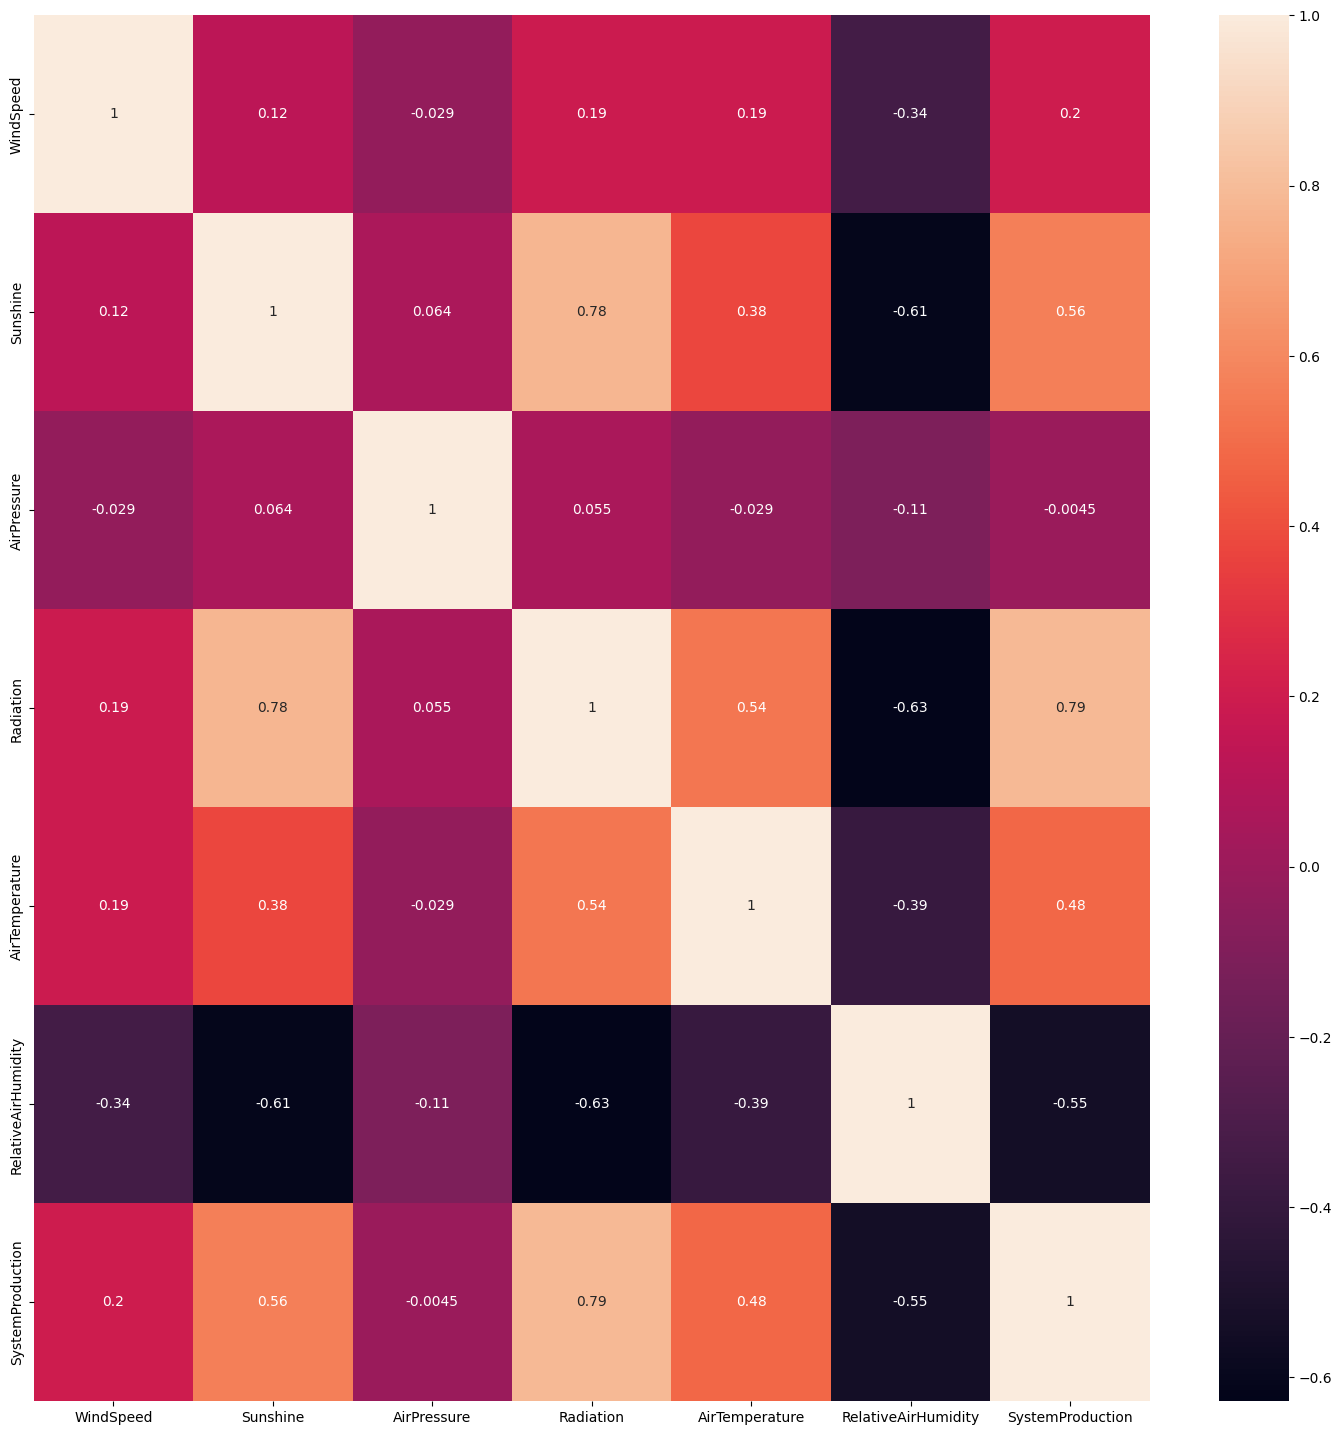

In [ ]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(), ax = ax, annot = True)

XGBoost

In [39]:
import h2o
from h2o.estimators import H2OXGBoostEstimator
from sklearn.metrics import mean_squared_error

# Initialize H2O cluster
h2o.init()

# Load your dataset into an H2OFrame
data = h2o.import_file("Solar Power Plant Data.csv")

# Define the features (predictor variables) and the target variable
x = data.columns[:-1]  # Select all columns except the target variable
y = data.columns[-1]   # Select the target variable column

# Split the data into training and testing sets
train, test = data.split_frame([0.8], seed=42)

# Train the H2O XGBoost model for regression
model = H2OXGBoostEstimator()
model.train(x=x, y=y, training_frame=train)

# Make predictions on the testing data
predictions = model.predict(test)

# Convert H2O frame to pandas dataframe
predictions_df = predictions.as_data_frame()

# Extract the actual target variable values from the test data
y_true = test[y].as_data_frame()[y]

# Compute the root mean squared error (RMSE)
rmse = mean_squared_error(y_true, predictions_df)**0.5
print("RMSE:", rmse)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 47 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,2 months and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_3zpzsx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.899 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Date-Hour(NMT)]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
RMSE: 738.4489824770209


Logistic Regression 

In [45]:
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator
from sklearn.metrics import mean_squared_error

# Initialize H2O cluster
h2o.init()

# Load your dataset into an H2OFrame
data = h2o.import_file("Solar Power Plant Data.csv")

# Define the features (predictor variables) and the target variable
x = data.columns[:-1]  # Select all columns except the target variable
y = data.columns[-1]   # Select the target variable column

# Split the data into training and testing sets
train, test = data.split_frame([0.8], seed=42)

# Train the H2O regression model
model = H2OGeneralizedLinearEstimator(family="gaussian")
model.train(x=x, y=y, training_frame=train)

# Make predictions on the testing data
predictions = model.predict(test)

# Convert H2O frame to pandas dataframe
predictions_df = predictions.as_data_frame()

# Extract the actual target variable values from the test data
y_true = test[y].as_data_frame()[y]

# Compute the root mean squared error (RMSE)
rmse = mean_squared_error(y_true, predictions_df)**0.5
print("RMSE:", rmse)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 56 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,2 months and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_3zpzsx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.898 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Date-Hour(NMT)]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
RMSE: 1007.1902780928782


Random Forest

In [63]:
import h2o
from h2o.estimators import H2ORandomForestEstimator

# Initialize H2O cluster
h2o.init()

# Load your dataset into an H2OFrame
data = h2o.import_file("Solar Power Plant Data.csv")

# Define the features (predictor variables) and the target variable
x = data.columns[:-1]  # Select all columns except the target variable
y = data.columns[-1]   # Select the target variable column

# Split the data into training and testing sets
train, test = data.split_frame([0.8], seed=42)

# Create a Random Forest model
model = H2ORandomForestEstimator()

# Train the Random Forest model
model.train(x=x, y=y, training_frame=train)

# Make predictions on the testing data
predictions = model.predict(test)

# Print the predictions
print(predictions)

# Get the model performance
performance = model.model_performance(test_data=test)

# Print the model performance metrics
print(performance)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 17 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,2 months and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_3zpzsx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.894 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Date-Hour(NMT)]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
      predict
  0
257.488
  1.09
  5.16
  0.433334
  0
  0.000755396
  0
  0
  0
[1744 rows x 1 column]

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 527707.4948061006
RMSE: 726.4347835876946
MAE: 333.46652286047936
RMSLE: 2.215212712638546
Mean Residual Deviance: 527707.4948061006


Gradient Boosting model

In [67]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

# Initialize H2O cluster
h2o.init()

# Load your dataset into an H2OFrame
data = h2o.import_file("Solar Power Plant Data.csv")

# Define the features (predictor variables) and the target variable
x = data.columns[:-1]  # Select all columns except the target variable
y = data.columns[-1]   # Select the target variable column

# Split the data into training and testing sets
train, test = data.split_frame([0.8], seed=42)

# Create a Gradient Boosting model for regression
model = H2OGradientBoostingEstimator()

# Train the Gradient Boosting model
model.train(x=x, y=y, training_frame=train)

# Make predictions on the testing data
predictions = model.predict(test)

# Print the predictions
print(predictions)

# Get the model performance
performance = model.model_performance(test_data=test)

# Print the model performance metrics
print(performance)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 22 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,2 months and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_3zpzsx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.883 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [Date-Hour(NMT)]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict
 23.4917
237.168
 20.4489
 33.2783
  9.53152
  9.53152
  9.53152
  9.53152
  9.53152
  9.53152
[1744 rows x 1 column]

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 554522.4351462335
RMSE: 744.6626317643672
MAE: 344.91169912217714
RMSLE: NaN
Mean Residual Deviance: 554522.4351462335
